# HOUSE PRICE DATASET in INDIA

|Columns|Description|비고|
|------|---|---|
|POSTED_BY|부동산을 등록한 사람|Object|
|UNDER_CONSTRUCTION|현재 건설 중인지 여부|Int64|
|RERA|RERA 승인 여부|Int64|
|BHK_NO|방의 수|Int64|
|BHK_OR_RK|부동산 유형|Object|
|SQUARE_FT|집의 총 면적|Float64|
|READY_TO_MOVE|이동 준비 여부|Int64|
|RESALE|재판매 여부|Int64|
|ADDRESS|집의 주소|Object|
|LONGITUDE|집의 경도|Float64|
|LATITUDE|집의 위도|Float64|

In [1]:
import pandas as pd

house_df = pd.read_csv('.\\train.csv')
df_train = house_df.copy()
df_train.info()
df_test = pd.read_csv('.\\test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 11 co

In [2]:
df_train.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [3]:
df_train.shape

(29451, 12)

In [4]:
df_train.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [5]:
df_train.head(5)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


## 데이터 변경

중복된 데이터 제거

TARGET(PRICE_IN_LACS) -> PRICE

POSTED_BY의 경우 Owner = 0, Dealer=1, Builder=2로 한다.

BHK_OR_RK의 경우 BHK = 0, RK=1로 한다.

ADDRESS를 어떻게 해야할지 고민 (위도, 경도로 대체할 예정)


In [6]:
duplicate_rows = df_train[df_train.duplicated()]

print(duplicate_rows)

      POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
1904     Dealer                   1     0        3       BHK  1209.628644   
2351     Dealer                   0     0        2       BHK   896.680112   
2611     Dealer                   0     0        3       BHK  1350.256549   
2618     Dealer                   1     0        2       BHK   800.000000   
3211      Owner                   0     0        2       BHK   712.105799   
...         ...                 ...   ...      ...       ...          ...   
29321    Dealer                   0     1        1       BHK   649.641577   
29345    Dealer                   1     1        3       BHK  1563.155686   
29357     Owner                   0     1        3       BHK  1446.201311   
29389   Builder                   1     0        3       BHK   979.290979   
29410    Dealer                   1     0        1       BHK   650.022160   

       READY_TO_MOVE  RESALE                        ADDRESS  LONGITUDE  \
1

In [7]:
df_train.drop_duplicates(inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29050 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29050 non-null  object 
 1   UNDER_CONSTRUCTION     29050 non-null  int64  
 2   RERA                   29050 non-null  int64  
 3   BHK_NO.                29050 non-null  int64  
 4   BHK_OR_RK              29050 non-null  object 
 5   SQUARE_FT              29050 non-null  float64
 6   READY_TO_MOVE          29050 non-null  int64  
 7   RESALE                 29050 non-null  int64  
 8   ADDRESS                29050 non-null  object 
 9   LONGITUDE              29050 non-null  float64
 10  LATITUDE               29050 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29050 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.9+ MB


In [8]:
df_train.rename(columns = {'TARGET(PRICE_IN_LACS)':"PRICE"}, inplace=True)

In [9]:
df_train["POSTED_BY"].value_counts()

Dealer     17961
Owner      10470
Builder      619
Name: POSTED_BY, dtype: int64

In [10]:
df_train["BHK_OR_RK"].value_counts()

BHK    29026
RK        24
Name: BHK_OR_RK, dtype: int64

In [11]:
df_train.replace({"POSTED_BY":{"Owner":0,"Dealer":1,"Builder":2}},inplace=True)
df_train.replace({"BHK_OR_RK":{"BHK":0,"RK":1}},inplace=True)

## 전체 데이터 상관관계 분석

ADDRESS 제외

C:\Users\hanto\AppData\Local\Temp\ipykernel_1392\2979796282.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True,fmt= '.2f')


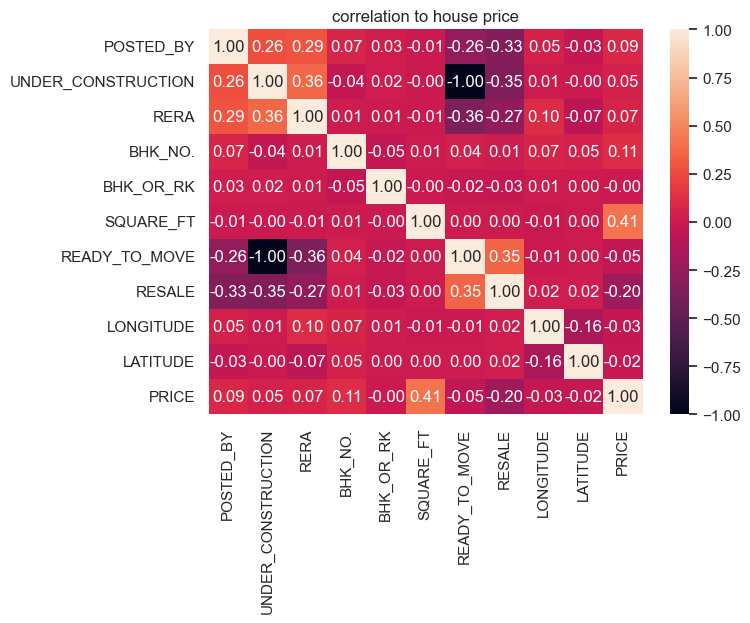

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(7,5)})


sns.heatmap(df_train.corr(), annot=True,fmt= '.2f')
plt.title("correlation to house price")
plt.show()

단순히 히트맵의 결과로는 0.1 or -0.1보다 크거나 작은 수만 챙기면
- BHK_NO
- SQUARE_FT
- RESALE

집의 크기가 가장 큰 영향을 주었고 재판매 여부가 다음 방의 갯수가 마지막으로 영향을 주었다.

resale의 경우 역관계성이므로 가격이 낮아지는 경향이 있는것 같다.

집값을 제외한 각 속성간의 상관관계 분석
- UNDER_CONSTRUCTION은 RERA, READY_TO_MOVE, RESALE
- RERA는 UNDER_CONSTRUCTION, READY_TO_MOVE, RESALE, LONGITUDE

- 지역별로 어떻게 집이 분포되어있는지 MAP을 확인해본다

In [13]:
import plotly.express as px

fig = px.scatter_mapbox(df_train,
                        lat=df_train.LONGITUDE,
                        lon=df_train.LATITUDE,
                        size=df_train.PRICE,
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=15,
                        zoom=10,
                        mapbox_style="carto-positron")

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

일단 에러가 고쳐지지 않는다... 코랩에서는 잘되는데 이걸 확인하면 인도 뿐만 아니라 다른 나라의 데이터도 있다는걸 알 수 있다 이는 결측치로 제거한다.

<Axes: xlabel='POSTED_BY', ylabel='PRICE'>

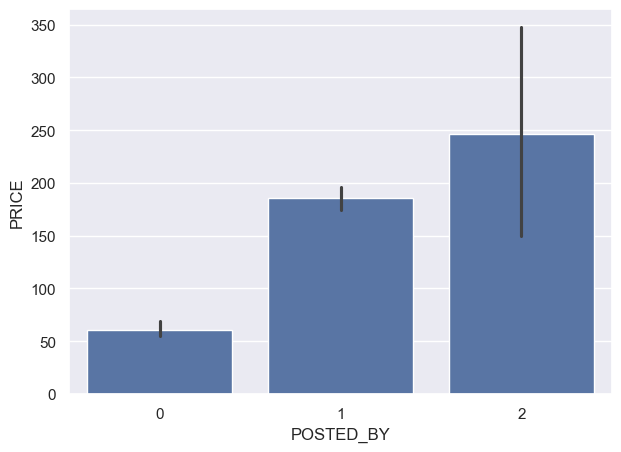

In [14]:
sns.barplot(data=df_train, x="POSTED_BY",y="PRICE")


- 집의 크기와 각 가격이 어떻게 분포하는지 확인해본다

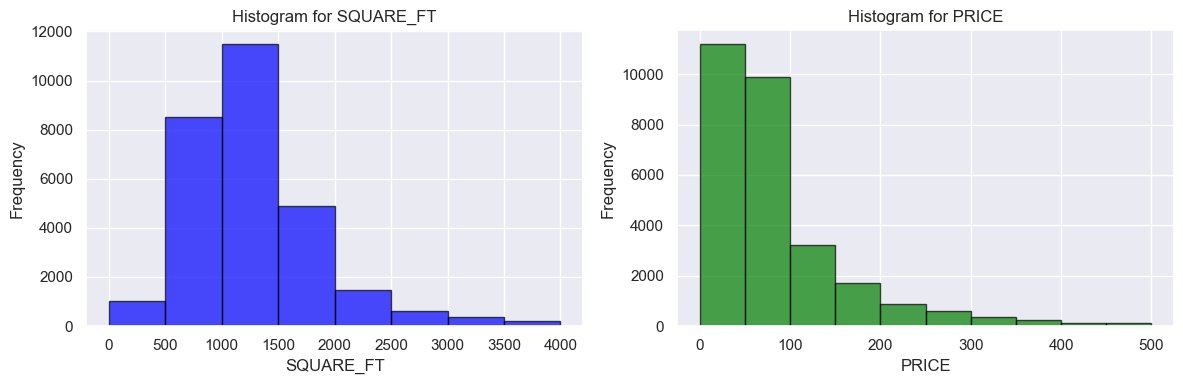

In [31]:
plt.figure(figsize=(12,4))

sqft_range = [0,500,1000,1500,2000,2500,3000,3500,4000]
target = [0,50,100,150,200,250,300,350,400,450,500]

# Histogram for SQUARE_FT
plt.subplot(1, 2, 1)
plt.hist(df_train['SQUARE_FT'], color='blue',bins=sqft_range, edgecolor='black', alpha=0.7)
plt.title('Histogram for SQUARE_FT')
plt.xlabel('SQUARE_FT')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for TARGET
plt.subplot(1, 2, 2)
plt.hist(df_train['PRICE'], bins=target, color='green', edgecolor='black', alpha=0.7)
plt.title('Histogram for PRICE')
plt.xlabel('PRICE')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

평수는 정규분포와 비슷한 형태 하지만 가격의 경우 낮은 가격때가 많다

- ADDRESS에서 도시의 이름만 추출하기 위한 과정

In [16]:
df_train[['address', 'CITY']] = df_train['ADDRESS'].str.split(',', 1, expand=True)
df_train.drop(columns=['ADDRESS','address'], inplace=True)

df_train.head()


C:\Users\hanto\AppData\Local\Temp\ipykernel_1392\3089859922.py:1: FutureWarning:

In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.



,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,PRICE,CITY
0,0,0,0,2,0,1300.236407,1,1,12.969910,77.597960,55.0,Bangalore
1,1,0,0,2,0,1275.000000,1,1,12.274538,76.644605,51.0,Mysore
2,0,0,0,2,0,933.159722,1,1,12.778033,77.632191,43.0,Bangalore
3,0,0,1,2,0,929.921143,1,1,28.642300,77.344500,62.5,Ghaziabad
4,1,1,0,2,0,999.009247,0,1,22.592200,88.484911,60.5,Kolkata


In [17]:
df_train['CITY'].value_counts()

Bangalore                        4251
Lalitpur                         2957
Mumbai                           2003
Pune                             1973
Noida                            1716
                                 ... 
,Kolkata                            1
Jivarajpark,Rajkot                  1
opp To Nagarjuna Sch,Warangal       1
Patan Road,Raipur,Raipur            1
 Lake View Recidency,,Vapi          1
Name: CITY, Length: 445, dtype: int64

아직도 ','가 들어간 이름이 있다.

In [18]:
df_train[['CITY_NAME', 'CITY2']] = df_train['CITY'].str.split(',', 1, expand=True)

df_train.drop(columns=['CITY','CITY2'], inplace=True)
df_train['CITY_NAME'].value_counts()

C:\Users\hanto\AppData\Local\Temp\ipykernel_1392\1274903055.py:1: FutureWarning:

In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.



Bangalore               4251
Lalitpur                2957
Mumbai                  2003
Pune                    1973
Noida                   1716
                        ... 
 ELECTRICITY COLONY        1
Chhindwara                 1
Jivarajpark                1
opp To Nagarjuna Sch       1
 Lake View Recidency       1
Name: CITY_NAME, Length: 433, dtype: int64

C:\Users\hanto\AppData\Local\Temp\ipykernel_1392\2261533504.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




<Axes: xlabel='CITY_NAME', ylabel='PRICE'>

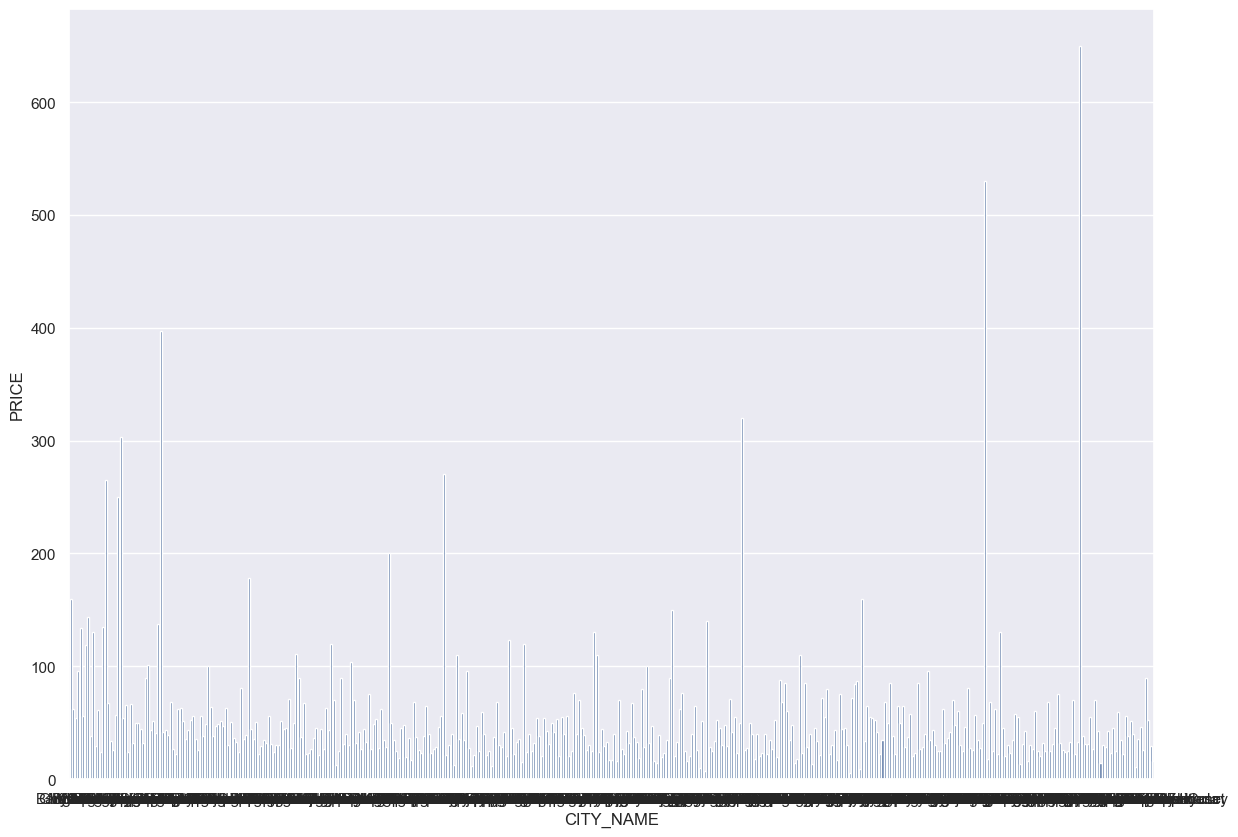

In [19]:
plt.figure(figsize=(14, 10)) 

sns.barplot(data=df_train, x='CITY_NAME', y='PRICE',ci=None,estimator='mean')

- 433개의 도시가 추출되어 각 도시별 가격 분포이다.

## 모델 학습

- RandomForest 사용
- 데이터 분석의 미흡으로 현재 데이터 중 CITY_NAME을 제외 후 학습
- GridSearch를 이용해 최적의 parmeter 찾기

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [28]:
X = df_train.drop(["PRICE","CITY_NAME"],axis=1)

y = df_train["PRICE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

rf_param = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_param, cv=5, scoring='r2',verbose=1)

In [29]:
rf_grid.fit(X,y)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [1, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2', verbose=1)

학습까지 진행하고 결론

- EDA를 통해 CITY_NAME을 어떻게 사용할지 추후 정한다.
- 불필요한 값을 제거해야한다.
- TQDM의 중요성 fit을 진행하는데 50분이 걸림..(코랩이 약간 빠름) device사용도 고려해야하고 빠르게 학습할 수 있는 방안을 고민해야할 것 같다.
- plotly.express를 show하는 부분에서 external로 보여주려고 하다보니 에러가 발생한 것으로 추정 install과 update를 해봤지만 해결하지 못함 internal에 render하는 방법이나 코랩에서 동작시켜야 한다.